In [2]:
pip install missingno

In [3]:
# Import Required module

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [4]:
from pathlib import Path
import os
import sys

sys.path.append(str(Path(os.getcwd()).parents[1]))
from Helper_Functions import common_utils, classification_utils
directory_to_extract_to = os.getcwd()

common_utils.load_data_from_one_drive(directory_to_extract_to, "classification_paths", "income_train")

Extracting : 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]


In [5]:
# Read data from CSV using read_csv method of pandas
# data = pd.read_csv(path_of_the_csv)

income_data_train = pd.read_csv("train.csv")
#here just printing the training data set
income_data_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
income_data_train.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


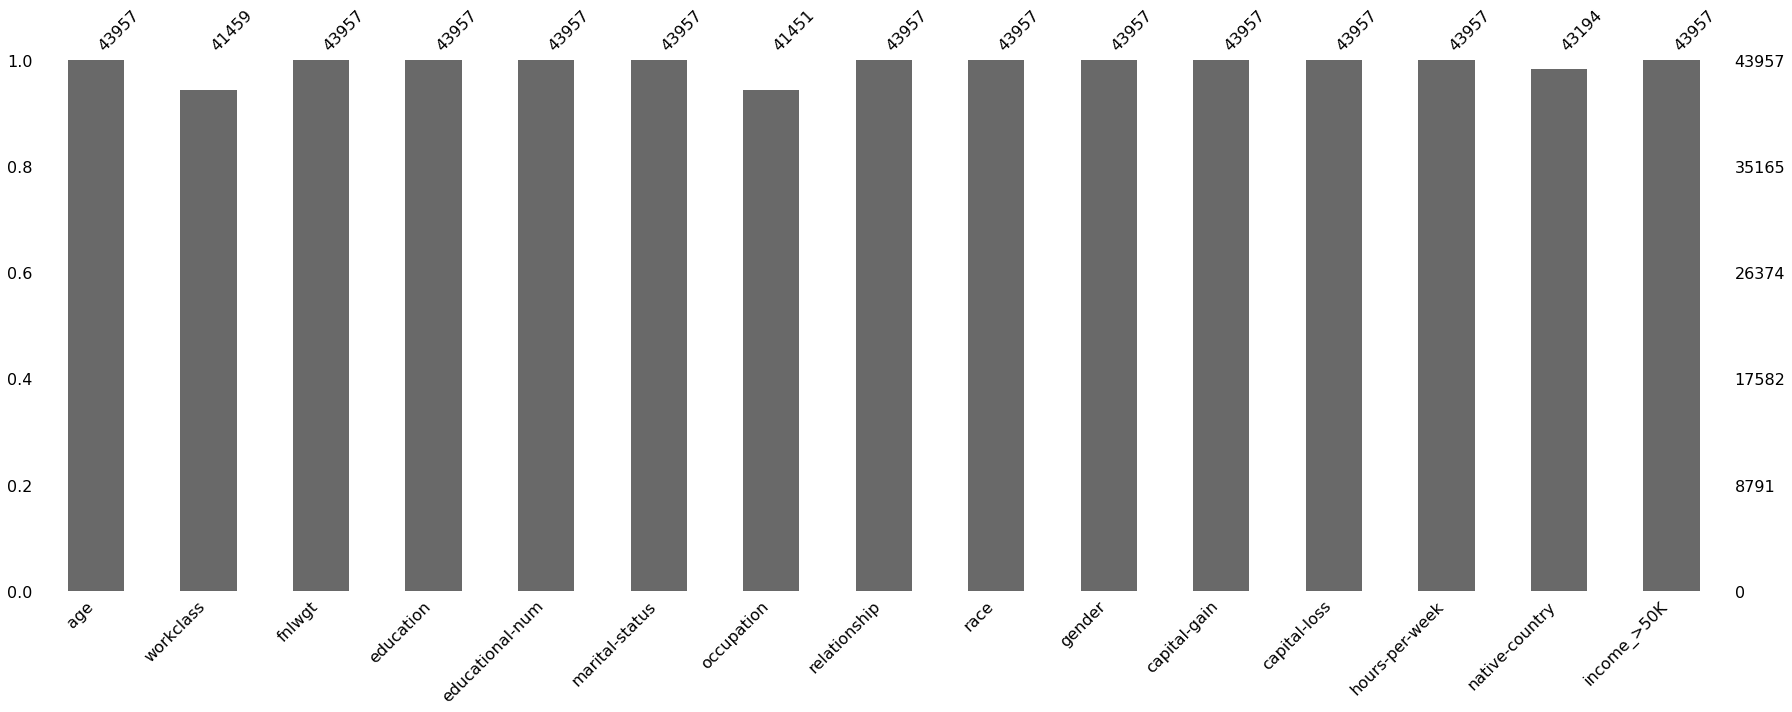

In [ ]:
income_data_train.info()
msno.bar(income_data_train)

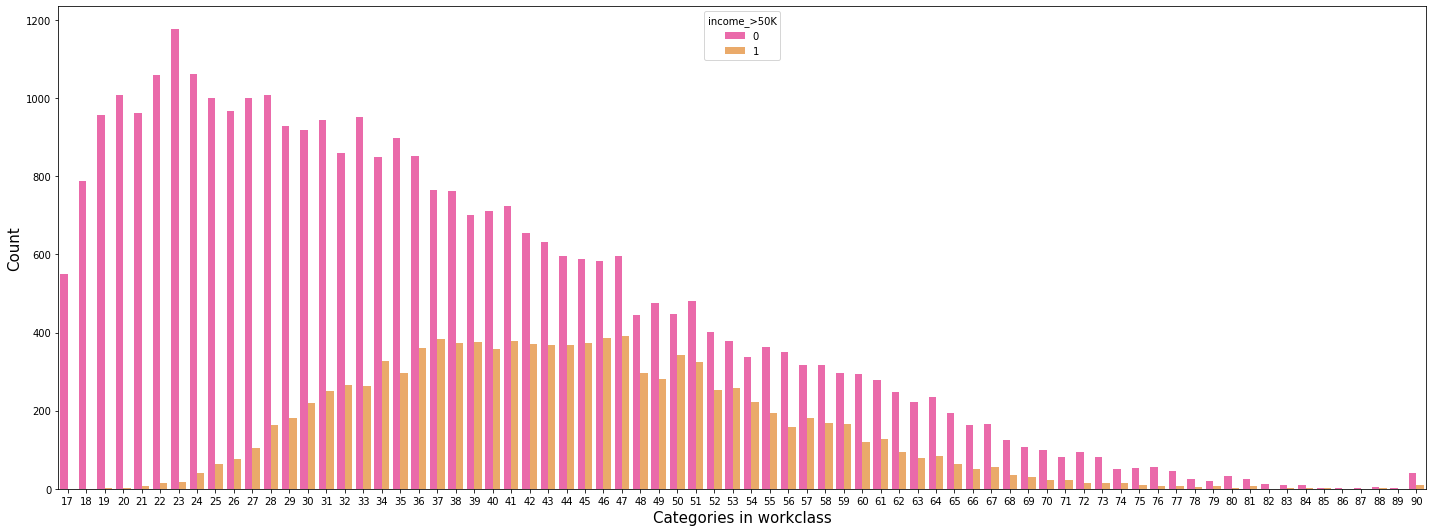

In [ ]:
# Visulizing data
sns.countplot(x='age', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

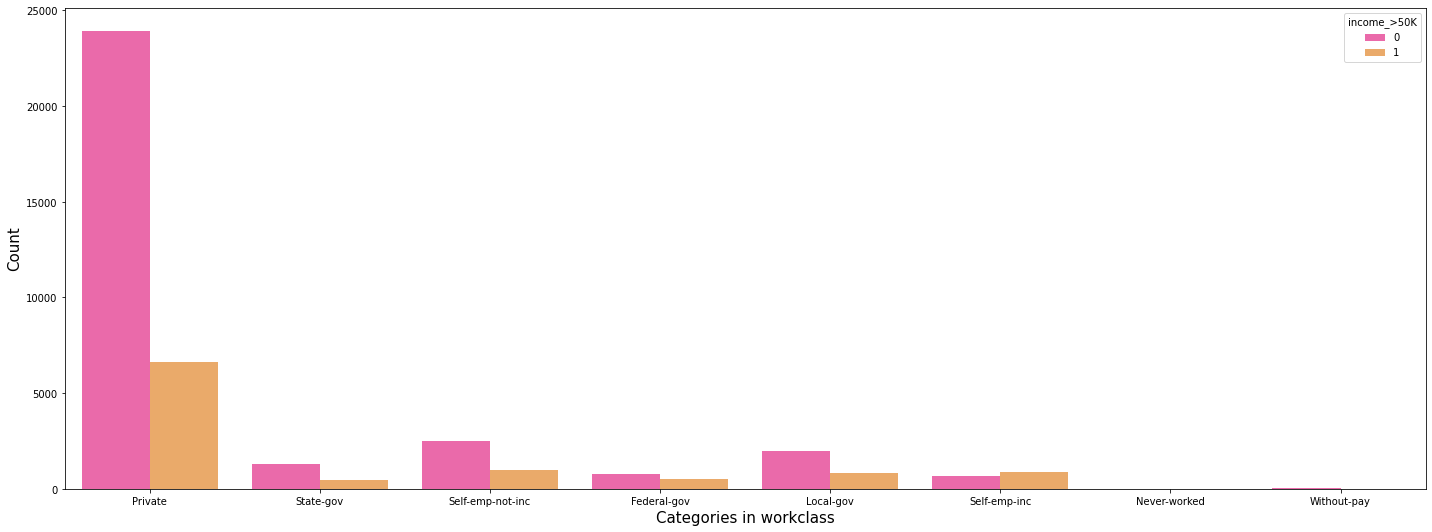

In [ ]:
# Visulizing data
sns.countplot(x='workclass', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

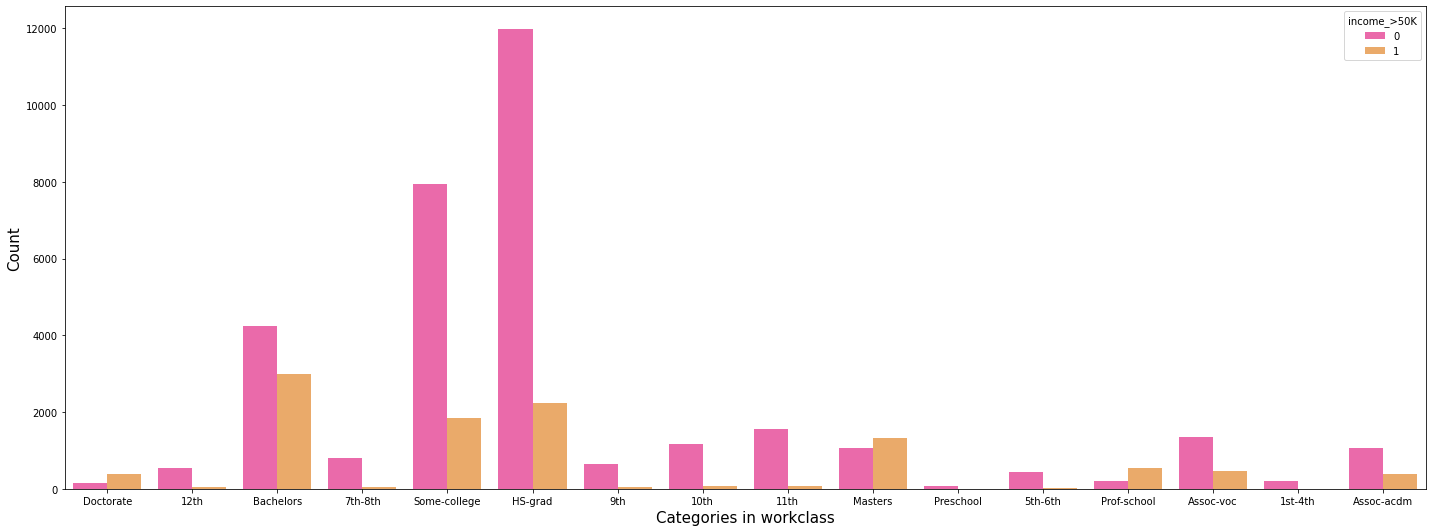

In [ ]:
# Visulizing data
sns.countplot(x='education', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

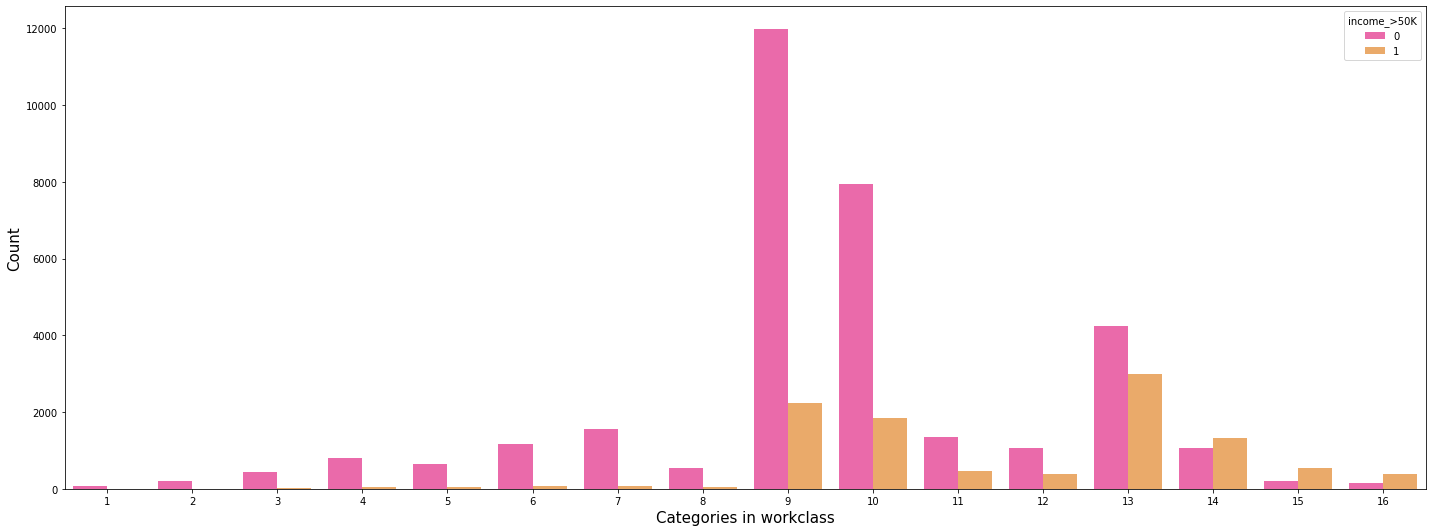

In [ ]:
# Visulizing data
sns.countplot(x='educational-num', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

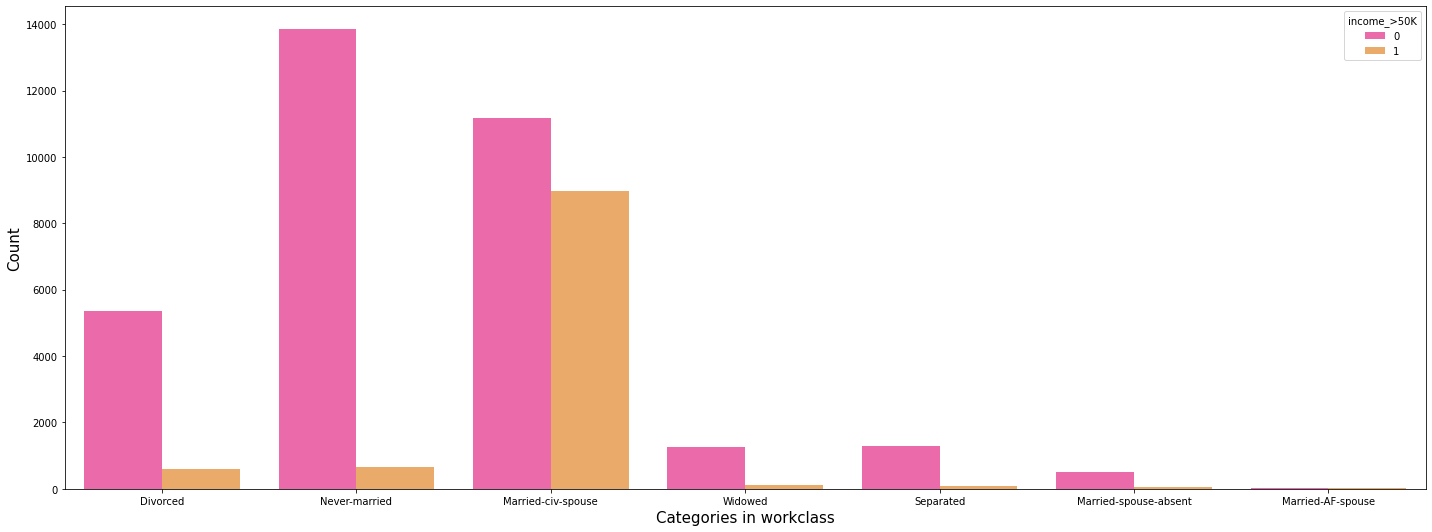

In [ ]:
# Visulizing data
sns.countplot(x='marital-status', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

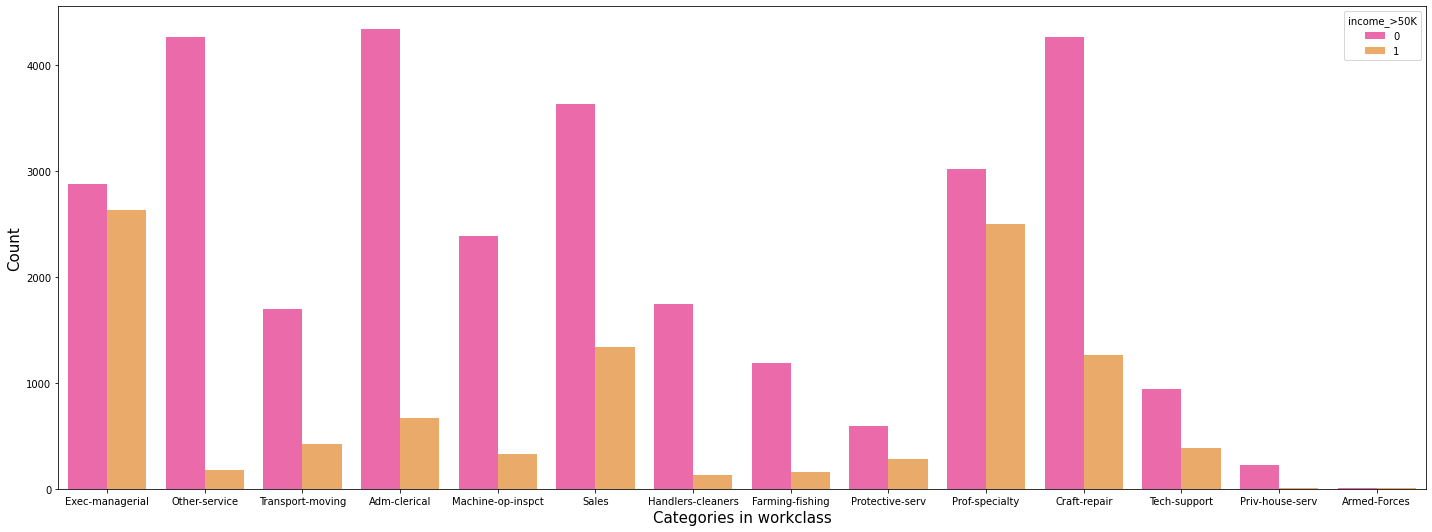

In [ ]:
# Visulizing data
sns.countplot(x='occupation', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

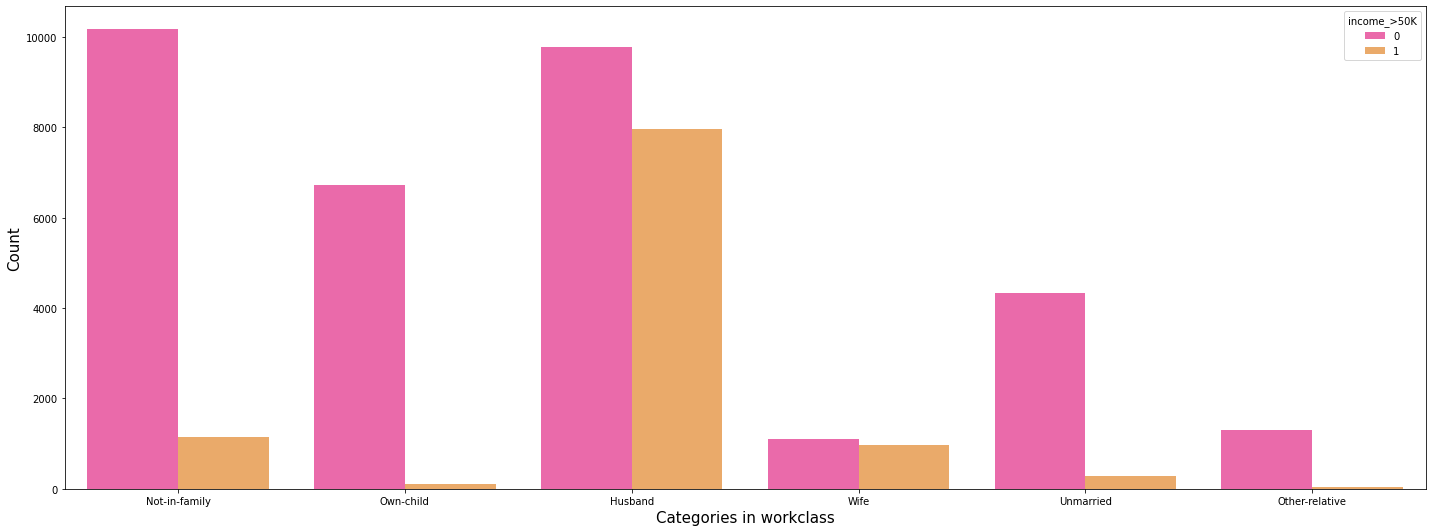

In [ ]:
# Visulizing data
sns.countplot(x='relationship', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

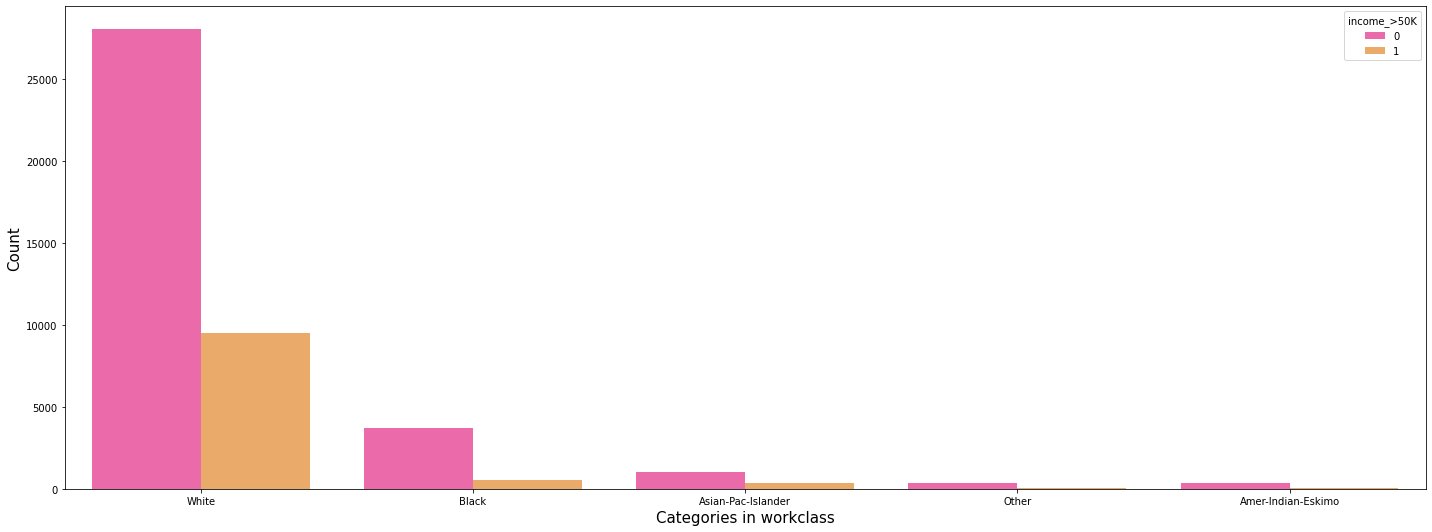

In [ ]:
# Visulizing data
sns.countplot(x='race', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

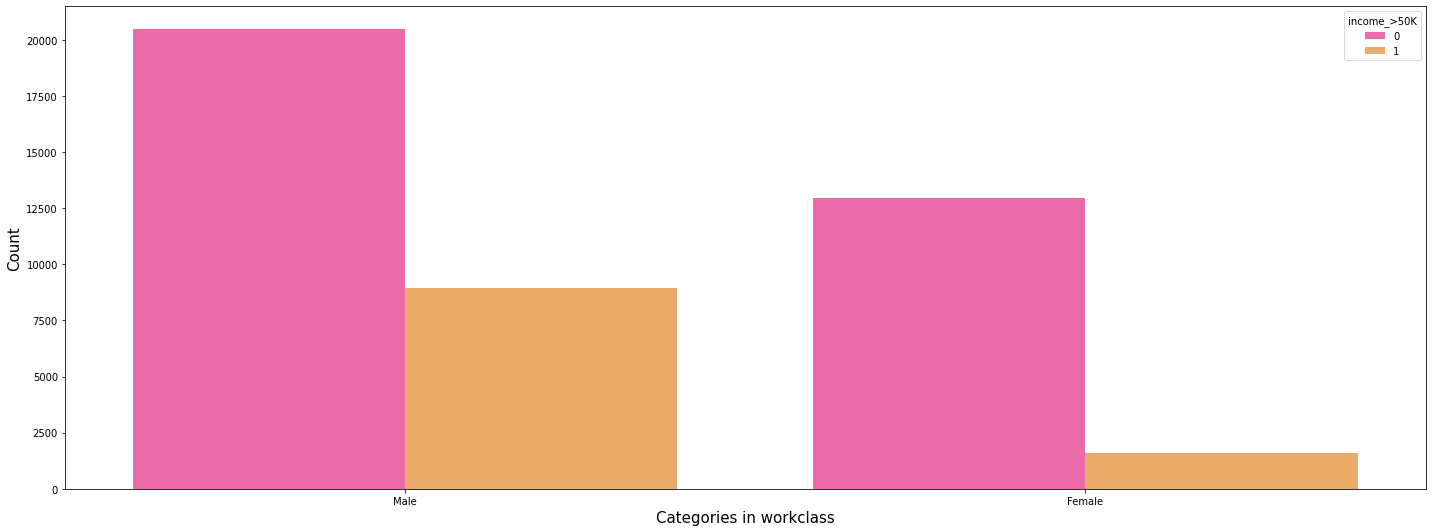

In [ ]:
# Visulizing data
sns.countplot(x='gender', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

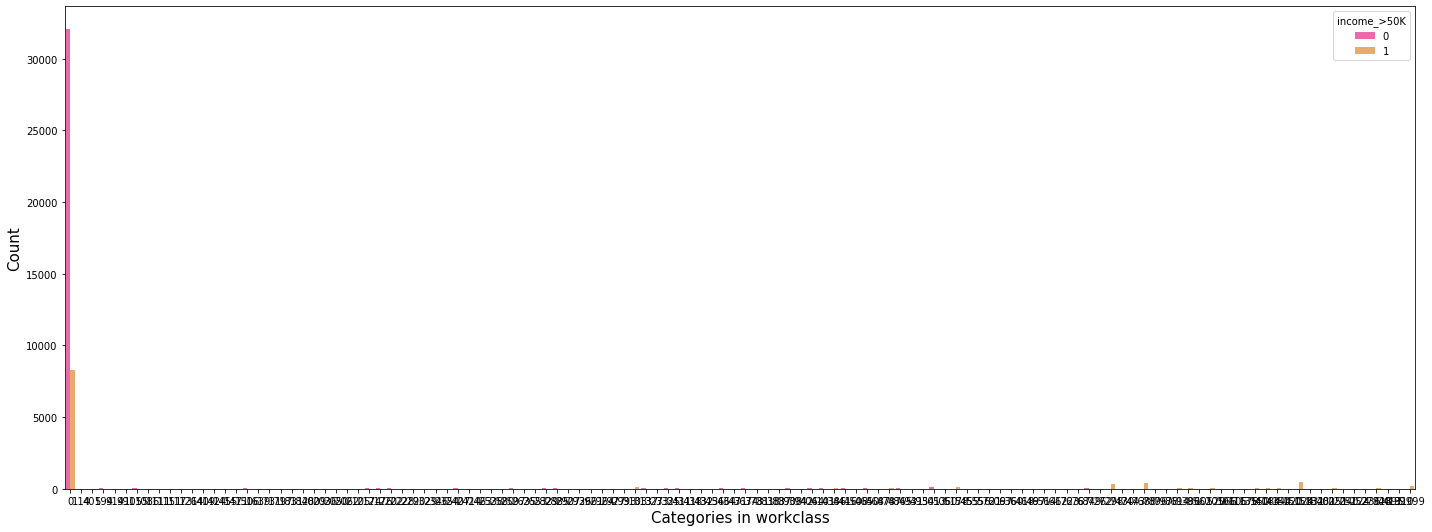

In [ ]:
# Visulizing data
sns.countplot(x='capital-gain', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

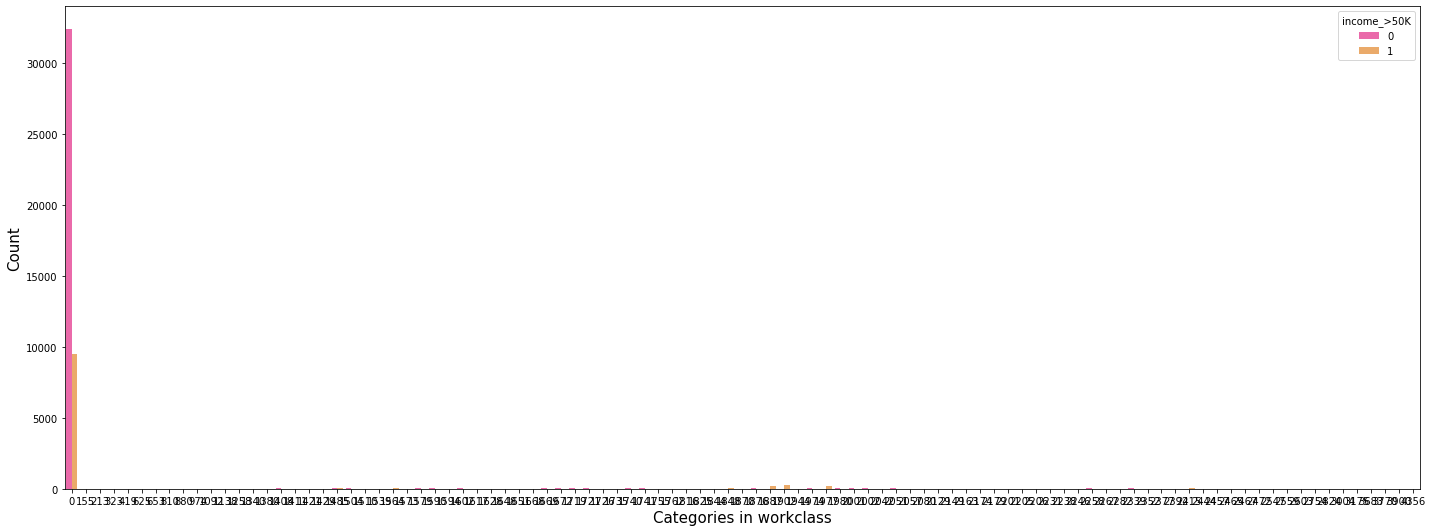

In [ ]:
# Visulizing data
sns.countplot(x='capital-loss', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

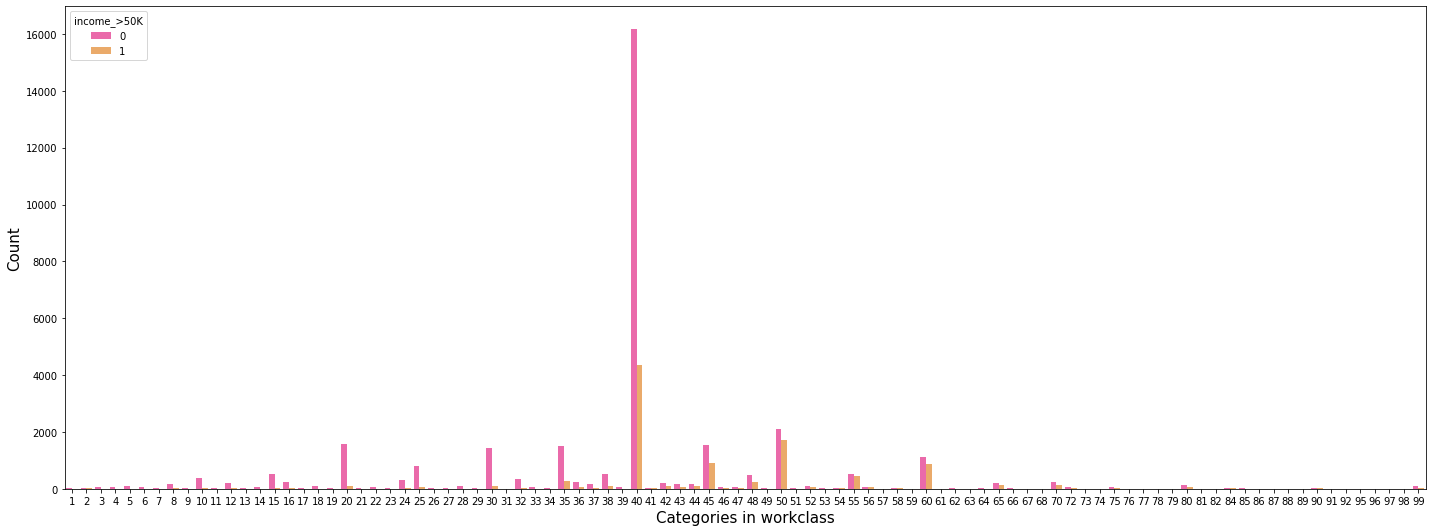

In [ ]:
# Visulizing data
sns.countplot(x='hours-per-week', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

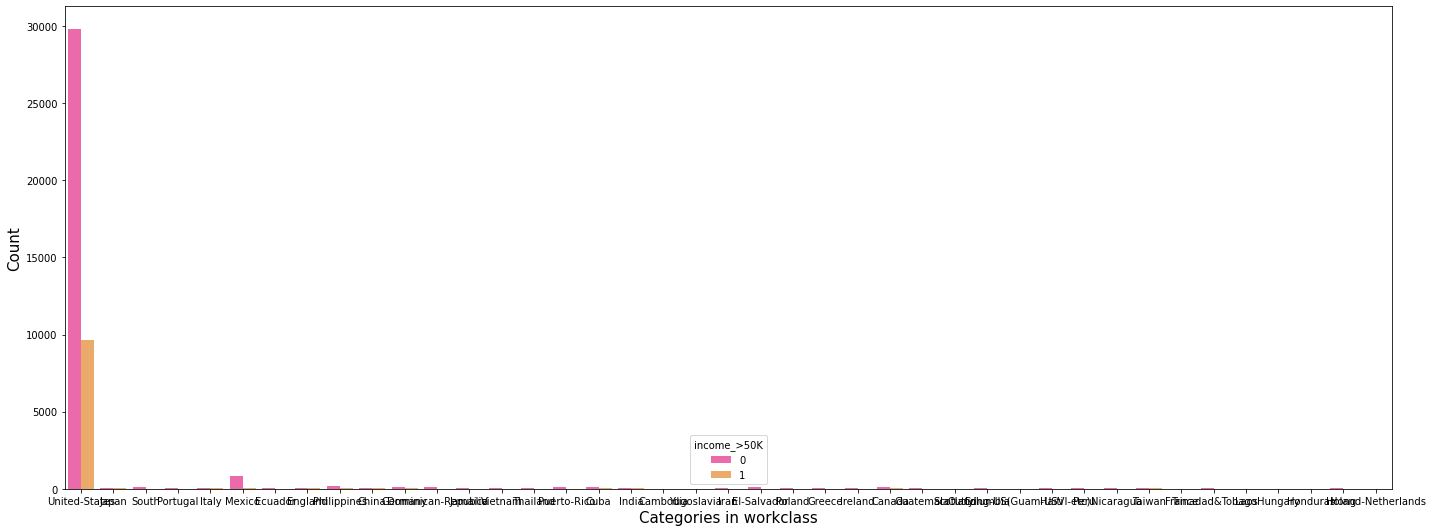

In [ ]:
# Visulizing data
sns.countplot(x='native-country', hue='income_>50K', palette='spring',data=income_data_train)
plt.rcParams["figure.figsize"] = [20.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

In [ ]:
# Get dataset information 

common_utils.get_dataset_info(income_data_train, show_columns=True)

Head:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country

In [6]:
common_utils.load_data_from_one_drive(directory_to_extract_to, "classification_paths", "income_test")

Extracting : 100%|██████████| 1/1 [00:00<00:00, 53.88it/s]


In [7]:
# Read data from CSV using read_csv method of pandas
# data = pd.read_csv(path_of_the_csv)

income_data_test = pd.read_csv("test.csv")
#here just printing the testing data set
income_data_test.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,38.576196,194150.017798,10.185762,728.913237,111.929922,41.121246
std,13.079061,104945.494349,2.477511,4355.969800,442.980441,12.397005
min,17.000000,21472.000000,1.000000,0.000000,0.000000,2.000000
25%,28.000000,120925.500000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,181434.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,243670.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,857532.000000,16.000000,99999.000000,2415.000000,99.000000


In [ ]:
income_data_test.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
5,45,Private,148900,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
6,34,Private,118786,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,20,United-States
7,38,Self-emp-inc,222532,Prof-school,15,Never-married,Sales,Not-in-family,White,Female,0,0,45,United-States
8,40,Private,270147,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
9,47,Private,184005,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,3325,0,45,United-States


In [ ]:
# Get dataset information 

common_utils.get_dataset_info(income_data_test, show_columns=True)

Head:
   age         workclass  fnlwgt   education  educational-num  \
0   39  Self-emp-not-inc  327120     HS-grad                9   
1   32           Private  123253  Assoc-acdm               12   
2   47           Private  232628     HS-grad                9   
3   19           Private  374262        12th                8   
4   46  Self-emp-not-inc  311231     HS-grad                9   

       marital-status         occupation relationship   race gender  \
0  Married-civ-spouse       Craft-repair      Husband  White   Male   
1  Married-civ-spouse       Craft-repair      Husband  White   Male   
2  Married-civ-spouse       Craft-repair      Husband  Black   Male   
3       Never-married  Handlers-cleaners    Own-child  White   Male   
4  Married-civ-spouse    Farming-fishing      Husband  White   Male   

   capital-gain  capital-loss  hours-per-week native-country  
0             0             0              40       Portugal  
1             0             0              42  Uni

In [ ]:
# check the count and % of missing data

common_utils.get_count_and_percentage_missing_values(income_data_train)

                 count  % null
age                  0     0.0
workclass         2498     5.7
fnlwgt               0     0.0
education            0     0.0
educational-num      0     0.0
marital-status       0     0.0
occupation        2506     5.7
relationship         0     0.0
race                 0     0.0
gender               0     0.0
capital-gain         0     0.0
capital-loss         0     0.0
hours-per-week       0     0.0
native-country     763     1.7
income_>50K          0     0.0


In [ ]:
from scipy import stats
lst = ["occupation", "native-country", "workclass"]

for val in lst:
  income_data_train[val] = income_data_train[val].fillna(stats.mode(income_data_train[val])[0][0])

In [ ]:
# check the count and % of missing data

common_utils.get_count_and_percentage_missing_values(income_data_train)

                 count  % null
age                  0     0.0
workclass            0     0.0
fnlwgt               0     0.0
education            0     0.0
educational-num      0     0.0
marital-status       0     0.0
occupation           0     0.0
relationship         0     0.0
race                 0     0.0
gender               0     0.0
capital-gain         0     0.0
capital-loss         0     0.0
hours-per-week       0     0.0
native-country       0     0.0
income_>50K          0     0.0


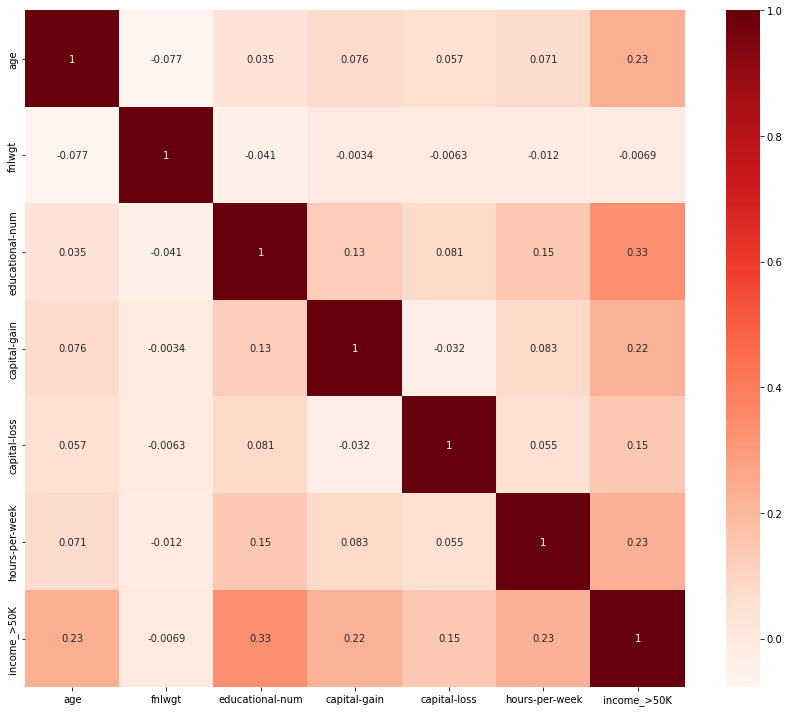

In [ ]:
#plotting the heatmap

plt.figure(figsize=(12, 10))
corr = income_data_train.corr()
sns.heatmap(corr, annot = True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
print(corr["income_>50K"].sort_values(ascending=False), '\n')

income_>50K        1.000000
educational-num    0.334035
age                0.230988
hours-per-week     0.227918
capital-gain       0.223325
capital-loss       0.145250
fnlwgt            -0.006852
Name: income_>50K, dtype: float64 



In [ ]:
# dropping fnlwgt table

income_data_train1 = income_data_train.drop('fnlwgt', axis=1, inplace=False)
income_data_train1.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


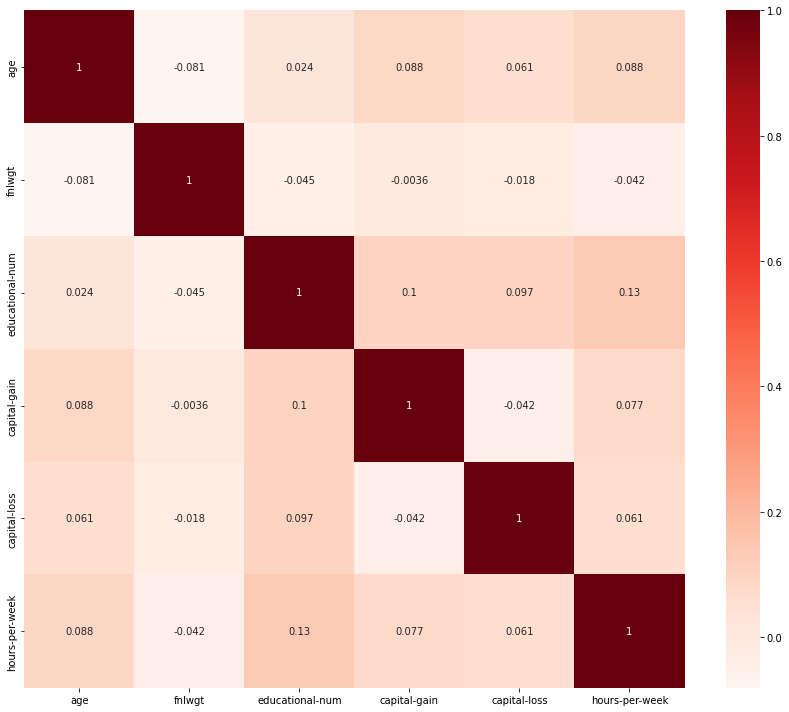

In [ ]:
#plotting the heatmap

plt.figure(figsize=(12, 10))
corr = income_data_test.corr()
sns.heatmap(corr, annot = True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# dropping fnlwgt table who's ha

income_data_test1 = income_data_test.drop('fnlwgt', axis=1, inplace=False)
income_data_test1.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,899.000000,899.000000,899.000000,899.000000,899.000000
mean,38.576196,10.185762,728.913237,111.929922,41.121246
std,13.079061,2.477511,4355.969800,442.980441,12.397005
min,17.000000,1.000000,0.000000,0.000000,2.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2415.000000,99.000000


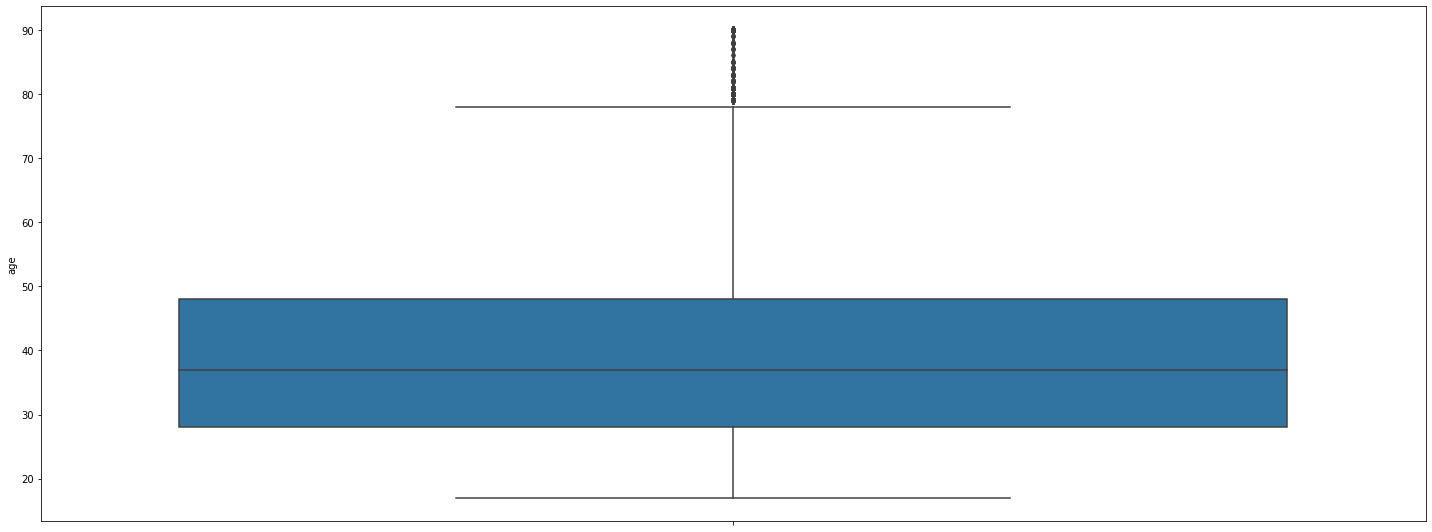

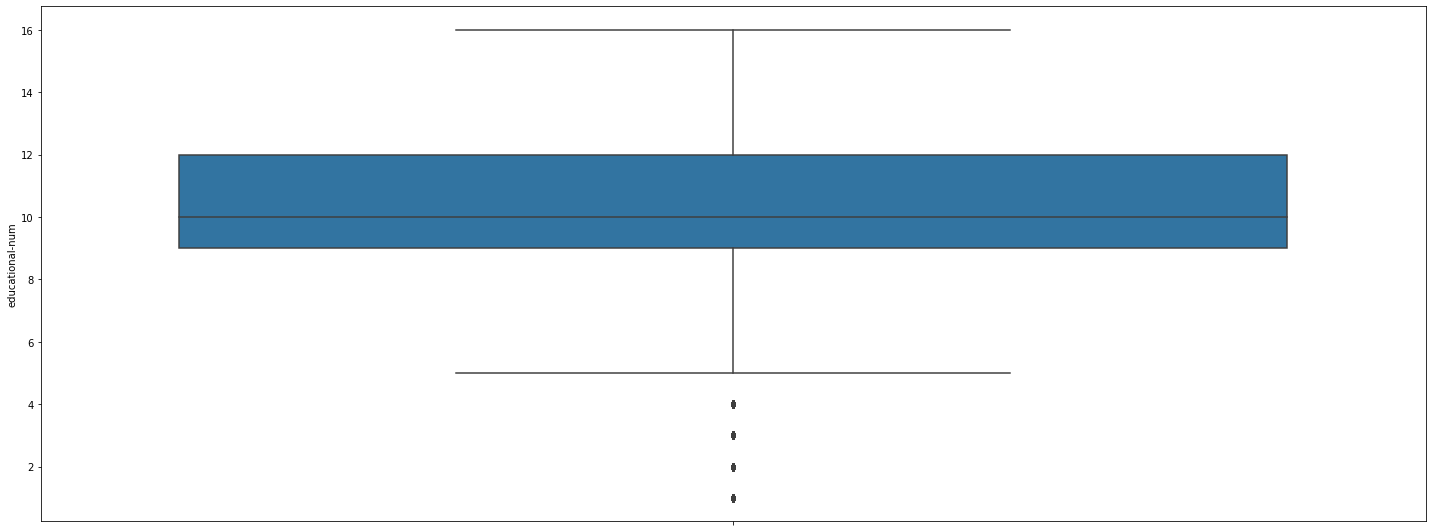

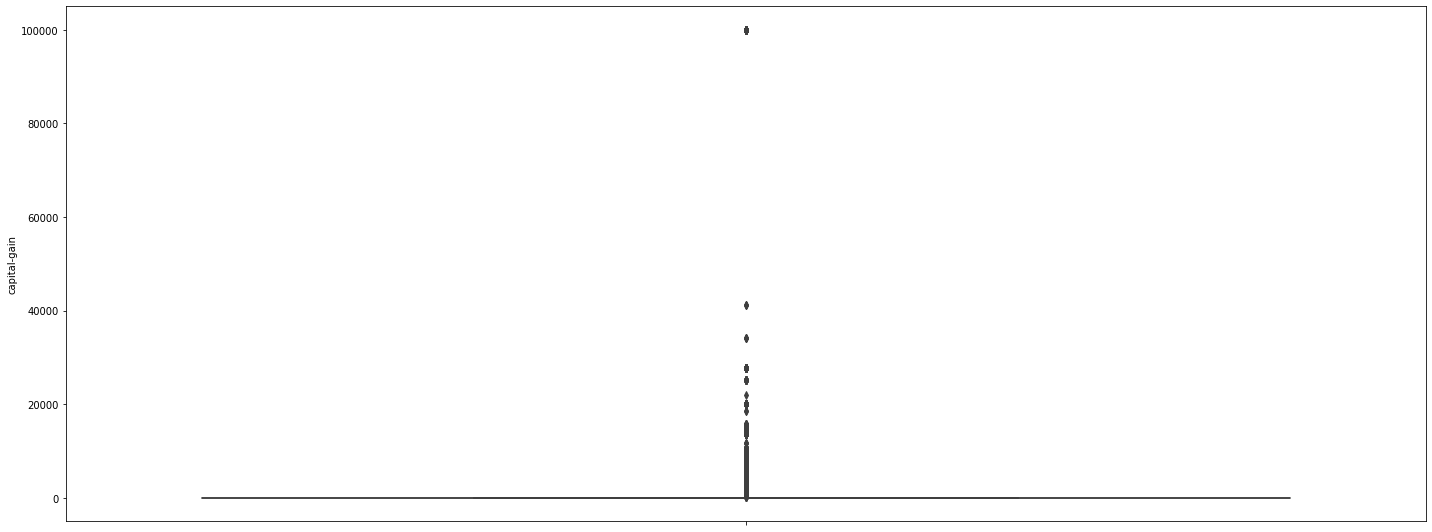

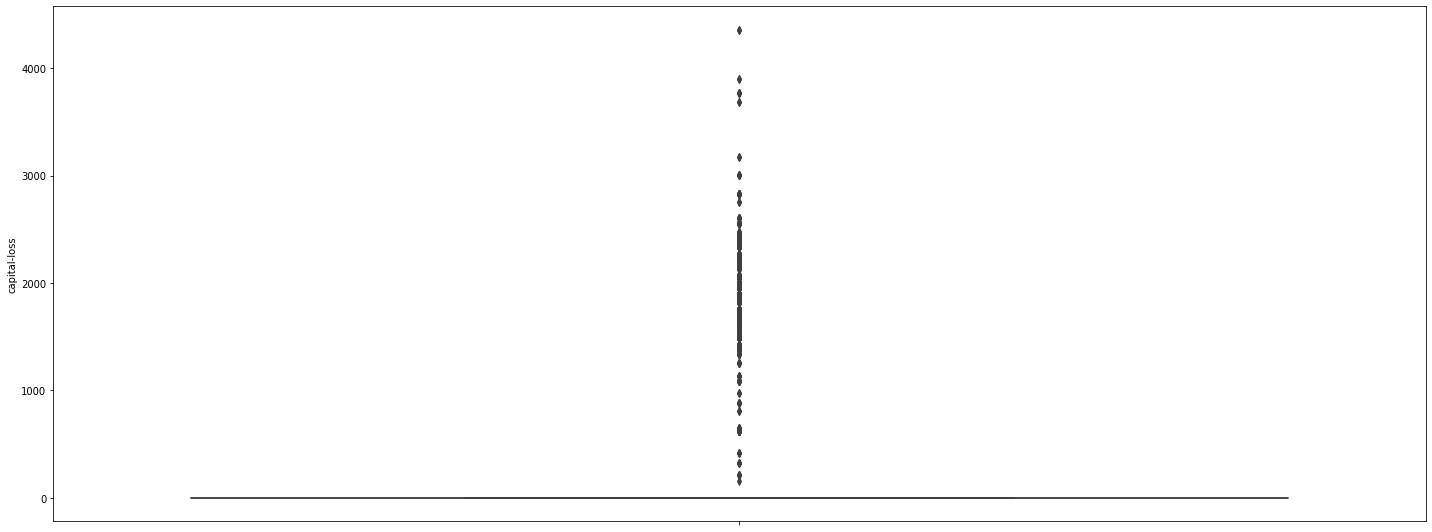

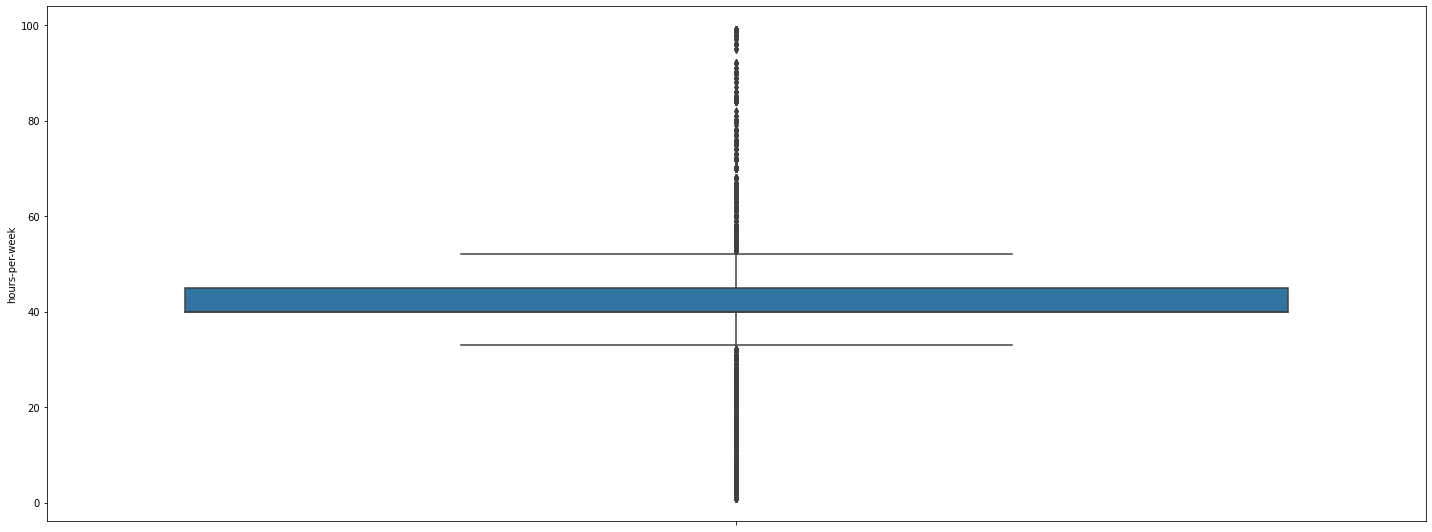

In [ ]:
# checking is there any outliars

list1 = ["age", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]

for col in list1:
    sns.boxplot(y = col, data = income_data_train1)
    plt.show()

In [ ]:
income_data_train1 = common_utils.remove_outlier_IQR(income_data_train1)

/content/Helper_Functions/common_utils.py:345: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
income_data_test1 = common_utils.remove_outlier_IQR(income_data_test1)

/content/Helper_Functions/common_utils.py:345: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

list1 = ["workclass", "education", "marital-status", "relationship", "race", "gender", "native-country", "occupation"]

for col in list1:
  income_data_train1[col] = label_encoder.fit_transform(income_data_train1[col])
  income_data_train1[col].unique()

income_data_train1

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
4,25,6,11,10,4,7,1,2,1,0,0,40,37,0
5,59,6,8,9,4,0,3,4,1,0,0,40,37,0
8,28,3,8,9,4,5,1,4,1,0,0,50,37,0
13,20,3,8,9,4,5,3,4,1,0,0,40,37,0
20,31,3,11,10,2,13,0,4,1,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43941,33,3,11,10,0,9,1,4,1,0,0,40,37,0
43944,53,3,8,9,4,11,1,4,0,0,0,40,37,0
43953,19,3,8,9,4,7,3,4,0,0,0,40,37,0
43955,46,3,6,13,4,11,1,4,0,0,0,35,37,0


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

list2 = ["workclass", "education", "marital-status", "relationship", "race", "gender", "native-country", "occupation"]

for col in list2:
  income_data_test1[col] = label_encoder.fit_transform(income_data_test1[col])
  income_data_test1[col].unique()

income_data_test1

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,4,10,9,2,1,0,4,1,0,0,40,20
1,32,2,6,12,2,1,0,4,1,0,0,42,24
2,47,2,10,9,2,1,0,2,1,0,0,40,24
4,46,4,10,9,2,3,0,4,1,0,0,40,24
5,45,2,8,13,2,8,0,4,1,0,0,50,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,30,2,10,9,2,10,0,4,1,0,0,40,24
891,55,4,11,14,0,2,1,4,1,0,0,45,24
896,24,2,13,10,4,0,3,4,0,0,0,40,24
897,35,2,13,10,2,11,0,4,1,0,0,40,24


In [ ]:
num_features = [col for col in list(income_data_train1.columns) if income_data_train1[col].dtypes!=object and col!='income_>50K']
num_features

['age',
 'workclass',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [ ]:
scaling_col = common_utils.preprocess_numeric_column_data(income_data_train1[num_features])

In [ ]:
print(f"Columns to Standarlize: {scaling_col[0]}")
print(f"Columns to Normalize: {scaling_col[1]}")

Columns to Standarlize: ['workclass', 'educational-num', 'marital-status', 'occupation', 'capital-gain', 'capital-loss']
Columns to Normalize: ['age', 'education', 'relationship', 'race', 'gender', 'hours-per-week', 'native-country']


In [ ]:
standardize_col = ['workclass', 'educational-num', 'marital-status', 'occupation', 'gender', 'capital-gain', 'capital-loss']

income_data_train1[standardize_col] = preprocessing.StandardScaler().fit_transform(income_data_train1[standardize_col])

In [ ]:
normlize_col =['age', 'education', 'relationship', 'race', 'hours-per-week', 'native-country']

income_data_train1[normlize_col] = preprocessing.MinMaxScaler().fit_transform(income_data_train1[normlize_col])

In [ ]:
num_features1 = ['age', 'workclass', 'education', 'educational-num', 'marital-status', 'occupation','relationship','race','gender','capital-gain','capital-loss', 'hours-per-week', 'native-country']
scaling_col1 = common_utils.preprocess_numeric_column_data(income_data_test1[num_features])

In [ ]:
print(f"Columns to Standarlize: {scaling_col1[0]}")
print(f"Columns to Normalize: {scaling_col1[1]}")

Columns to Standarlize: ['educational-num', 'marital-status', 'occupation', 'capital-gain', 'capital-loss']
Columns to Normalize: ['age', 'workclass', 'education', 'relationship', 'race', 'gender', 'hours-per-week', 'native-country']


In [ ]:
standardize_col1 = ['educational-num', 'marital-status', 'occupation', 'capital-gain', 'capital-loss']

income_data_test1[standardize_col1] = preprocessing.StandardScaler().fit_transform(income_data_test1[standardize_col1])

In [ ]:
normlize_col1 = ['age', 'workclass', 'education', 'relationship', 'race', 'gender', 'hours-per-week', 'native-country']

income_data_test1[normlize_col1] = preprocessing.MinMaxScaler().fit_transform(income_data_test1[normlize_col1])

In [ ]:
X = income_data_train1.drop("income_>50K",axis=1)
print("X shape(features) : ",X.shape)

X shape(features) :  (20912, 13)


In [ ]:
y = income_data_train1['income_>50K']
print("y(target), shape : ",y.shape)

y(target), shape :  (20912,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
print('X_train size : ',X_train.shape)
print('X_test size : ',X_test.shape)
print('y_train size : ',y_train.shape)
print('y_test size : ',y_test.shape)

X_train size :  (14638, 13)
X_test size :  (6274, 13)
y_train size :  (14638,)
y_test size :  (6274,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print("DecisionTreeClassifier train data's mean accuracy = {} %".format((dtc.score(X_train,y_train)*100),2))
print("DecisionTreeClassifier test data's mean accuracy = {} %".format((dtc.score(X_test,y_test)*100),2))

DecisionTreeClassifier train data's mean accuracy = 100.0 %
DecisionTreeClassifier test data's mean accuracy = 100.0 %


In [ ]:
from sklearn import metrics

y_pred_dtc= dtc.predict(X_test)
dtc_accuracy = metrics.accuracy_score(y_test,y_pred_dtc)
print("DecisionTreeClassifier model accuracy = {} %".format(round((dtc_accuracy*100),2)))

DecisionTreeClassifier model accuracy = 100.0 %


In [ ]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)

print("RandomForestClassifier train data's mean accuracy = {} %".format(round((rfc.score(X_train,y_train)*100),2)))
print("RandomForestClassifier test data's mean accuracy = {} %".format(round((rfc.score(X_test,y_test)*100),2)))

y_pred_rfc=rfc.predict(X_test)

print("Recall/sensitivity of RandomForestClassifier model = {} %".format(round(metrics.recall_score(y_test,y_pred_rfc)*100,2)))

RandomForestClassifier train data's mean accuracy = 100.0 %
RandomForestClassifier test data's mean accuracy = 100.0 %
Recall/sensitivity of RandomForestClassifier model = 0.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
